In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc50 = np.loadtxt('./random_ipc_index/cifar100/ipc_50.txt', dtype=int)
ipc50

array([31300, 38520, 28448, 43568, 16035, 26872, 23194, 28116,  2710,
       41172, 33004, 42632, 14975, 19325, 36747, 13969, 48878, 35405,
       27011,  9972, 11121, 33403, 18794, 19272, 23678, 26207, 43666,
       42630,  7877, 30876, 24989, 32885, 34283,  6993, 14553, 19801,
       46441, 19164, 41141, 39455, 16187, 15525, 28857,  7546, 11717,
       25000, 49969,  4472,  6561, 11072, 38764, 41577, 19879,  3653,
        4051, 35854, 33138,  9779, 10407, 49445, 45233, 43210, 12293,
       33304, 18393, 41049, 40809,  6051, 10221, 19002, 41071, 17742,
       12616, 10319,  9192, 38429, 20415, 26299,  5537, 39008, 36658,
       36188, 14917, 36966, 11398,  3230,     4,  1219, 44352, 12134,
       48994, 23185, 32128,  2356, 26228,  3865, 33977, 45515,  3835,
       37049, 37346, 32290, 47569,  9773, 49110, 25042, 37171, 37923,
        9755, 33038, 32183, 20133, 14161,  9230, 28875, 47519, 32578,
       21870, 31650, 13469, 24458, 25413, 13454, 16479, 42360,   943,
       41904, 49413,

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 8
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc50))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

63

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar100_ipc50'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=100, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 63/63 [00:00<00:00, 94.01it/s, loss=0.987] 


epoch: 1 done, loss: 0.00317529053427279
Acc: 0.0261
[0.01]


Epoch 2: 100%|██████████| 63/63 [00:00<00:00, 178.25it/s, loss=1.73]


epoch: 2 done, loss: 0.002366310218349099
Acc: 0.0344
[0.01]


Epoch 3: 100%|██████████| 63/63 [00:00<00:00, 166.52it/s, loss=2.03] 


epoch: 3 done, loss: 0.0021889132913202047
Acc: 0.0361
[0.01]


Epoch 4: 100%|██████████| 63/63 [00:00<00:00, 172.62it/s, loss=2.27] 


epoch: 4 done, loss: 0.001976009691134095
Acc: 0.0416
[0.01]


Epoch 5: 100%|██████████| 63/63 [00:00<00:00, 171.38it/s, loss=0.929]


epoch: 5 done, loss: 0.0017057671211659908
Acc: 0.0384
[0.01]


Epoch 6: 100%|██████████| 63/63 [00:00<00:00, 151.87it/s, loss=0.757]


epoch: 6 done, loss: 0.0015285385306924582
Acc: 0.0402
[0.01]


Epoch 7: 100%|██████████| 63/63 [00:00<00:00, 178.66it/s, loss=1.03] 


epoch: 7 done, loss: 0.0014503825223073363
Acc: 0.0419
[0.01]


Epoch 8: 100%|██████████| 63/63 [00:00<00:00, 166.57it/s, loss=1.02] 


epoch: 8 done, loss: 0.0012052356032654643
Acc: 0.0436
[0.001]


Epoch 9: 100%|██████████| 63/63 [00:00<00:00, 154.21it/s, loss=2.29] 


epoch: 9 done, loss: 0.000910624919924885
Acc: 0.0451
[0.001]


Epoch 10: 100%|██████████| 63/63 [00:00<00:00, 175.41it/s, loss=0.217]


epoch: 10 done, loss: 0.0007875077426433563
Acc: 0.0456
[0.001]


Epoch 11: 100%|██████████| 63/63 [00:00<00:00, 167.63it/s, loss=0.404]


epoch: 11 done, loss: 0.0007195809739641845
Acc: 0.0454
[0.001]


Epoch 12: 100%|██████████| 63/63 [00:00<00:00, 178.09it/s, loss=0.222]


epoch: 12 done, loss: 0.0006897906423546374
Acc: 0.0464
[0.0001]


Epoch 13: 100%|██████████| 63/63 [00:00<00:00, 178.40it/s, loss=0.339]


epoch: 13 done, loss: 0.0006621709326282144
Acc: 0.0463
[0.0001]


Epoch 14: 100%|██████████| 63/63 [00:00<00:00, 190.18it/s, loss=0.696]


epoch: 14 done, loss: 0.0006900252192281187
Acc: 0.0462
[0.0001]


Epoch 15: 100%|██████████| 63/63 [00:00<00:00, 180.11it/s, loss=0.244]


epoch: 15 done, loss: 0.0006437661359086633
Acc: 0.0461
[0.0001]


Epoch 16: 100%|██████████| 63/63 [00:00<00:00, 178.36it/s, loss=0.442]


epoch: 16 done, loss: 0.0006337852100841701
Acc: 0.046
[1e-05]


Epoch 17: 100%|██████████| 63/63 [00:00<00:00, 167.07it/s, loss=0.791]


epoch: 17 done, loss: 0.0006423674640245736
Acc: 0.046
[1e-05]


Epoch 18: 100%|██████████| 63/63 [00:00<00:00, 185.13it/s, loss=1.01] 


epoch: 18 done, loss: 0.0006455002585425973
Acc: 0.0461
[1e-05]


Epoch 19: 100%|██████████| 63/63 [00:00<00:00, 171.40it/s, loss=0.395]


epoch: 19 done, loss: 0.0006249275174923241
Acc: 0.0461
[1e-05]


Epoch 20: 100%|██████████| 63/63 [00:00<00:00, 186.90it/s, loss=0.736]


epoch: 20 done, loss: 0.0006497042486444116
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 63/63 [00:00<00:00, 167.81it/s, loss=0.521]


epoch: 21 done, loss: 0.0006131470436230302
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 63/63 [00:00<00:00, 181.25it/s, loss=0.289]


epoch: 22 done, loss: 0.0006390999769791961
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 63/63 [00:00<00:00, 171.36it/s, loss=0.5]  


epoch: 23 done, loss: 0.0006000997382216156
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 63/63 [00:00<00:00, 177.58it/s, loss=0.525] 


epoch: 24 done, loss: 0.000618267513345927
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 63/63 [00:00<00:00, 174.84it/s, loss=0.706]


epoch: 25 done, loss: 0.0006547968368977308
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 63/63 [00:00<00:00, 179.53it/s, loss=0.644]


epoch: 26 done, loss: 0.0006478007417172194
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 63/63 [00:00<00:00, 184.03it/s, loss=0.16] 


epoch: 27 done, loss: 0.0006487240316346288
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 63/63 [00:00<00:00, 154.47it/s, loss=0.527]


epoch: 28 done, loss: 0.000612111936789006
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 63/63 [00:00<00:00, 173.07it/s, loss=0.434]


epoch: 29 done, loss: 0.0006312222685664892
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 63/63 [00:00<00:00, 168.52it/s, loss=0.838]


epoch: 30 done, loss: 0.0006457966519519687
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 63/63 [00:00<00:00, 167.66it/s, loss=0.201]


epoch: 31 done, loss: 0.0006610199343413115
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 63/63 [00:00<00:00, 166.03it/s, loss=0.0837]


epoch: 32 done, loss: 0.0006188758416101336
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 63/63 [00:00<00:00, 177.19it/s, loss=0.59] 


epoch: 33 done, loss: 0.0006333185592666268
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 63/63 [00:00<00:00, 174.66it/s, loss=0.224]


epoch: 34 done, loss: 0.000615282915532589
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 63/63 [00:00<00:00, 162.36it/s, loss=0.639]


epoch: 35 done, loss: 0.0006331796757876873
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 63/63 [00:00<00:00, 191.93it/s, loss=0.185]


epoch: 36 done, loss: 0.0006471112137660384
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 63/63 [00:00<00:00, 166.88it/s, loss=0.997]


epoch: 37 done, loss: 0.0006302893743850291
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 63/63 [00:00<00:00, 171.86it/s, loss=0.4]  


epoch: 38 done, loss: 0.0006470094085671008
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 63/63 [00:00<00:00, 154.47it/s, loss=0.58] 


epoch: 39 done, loss: 0.0006105126813054085
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 63/63 [00:00<00:00, 168.19it/s, loss=0.601]


epoch: 40 done, loss: 0.0006577516905963421
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 63/63 [00:00<00:00, 162.06it/s, loss=0.372]


epoch: 41 done, loss: 0.0006388705805875361
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 63/63 [00:00<00:00, 174.37it/s, loss=0.195]


epoch: 42 done, loss: 0.0006265047122724354
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 63/63 [00:00<00:00, 169.73it/s, loss=0.38] 


epoch: 43 done, loss: 0.0006260520312935114
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 63/63 [00:00<00:00, 168.81it/s, loss=0.272]


epoch: 44 done, loss: 0.0006150590488687158
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 63/63 [00:00<00:00, 165.44it/s, loss=0.132]


epoch: 45 done, loss: 0.0006464665057137609
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 63/63 [00:00<00:00, 167.03it/s, loss=0.824]


epoch: 46 done, loss: 0.0006287053693085909
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 63/63 [00:00<00:00, 151.04it/s, loss=0.685]


epoch: 47 done, loss: 0.000641024555079639
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 63/63 [00:00<00:00, 164.53it/s, loss=0.306]


epoch: 48 done, loss: 0.000609636539593339
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 63/63 [00:00<00:00, 145.20it/s, loss=1.06] 


epoch: 49 done, loss: 0.0006476414855569601
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 63/63 [00:00<00:00, 139.48it/s, loss=1.43] 


epoch: 50 done, loss: 0.0006366540910676122
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 63/63 [00:00<00:00, 151.37it/s, loss=0.216]


epoch: 51 done, loss: 0.0006396517273969948
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 63/63 [00:00<00:00, 155.48it/s, loss=0.153] 


epoch: 52 done, loss: 0.0006264311377890408
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 63/63 [00:00<00:00, 153.93it/s, loss=0.252]


epoch: 53 done, loss: 0.0006071480456739664
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 63/63 [00:00<00:00, 141.53it/s, loss=0.789]


epoch: 54 done, loss: 0.0006413562805391848
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 63/63 [00:00<00:00, 135.51it/s, loss=0.213]


epoch: 55 done, loss: 0.0006308027659542859
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 63/63 [00:00<00:00, 149.19it/s, loss=0.125]


epoch: 56 done, loss: 0.000615323951933533
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 63/63 [00:00<00:00, 132.44it/s, loss=0.351]


epoch: 57 done, loss: 0.0006227644626051188
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 63/63 [00:00<00:00, 142.21it/s, loss=0.122]


epoch: 58 done, loss: 0.0006526923971250653
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 63/63 [00:00<00:00, 129.08it/s, loss=0.774] 


epoch: 59 done, loss: 0.0006450343644246459
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 63/63 [00:00<00:00, 141.58it/s, loss=0.494]


epoch: 60 done, loss: 0.0006341228145174682
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 63/63 [00:00<00:00, 143.81it/s, loss=0.21] 


epoch: 61 done, loss: 0.0006572573911398649
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 63/63 [00:00<00:00, 135.86it/s, loss=0.257]


epoch: 62 done, loss: 0.0006368866306729615
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 63/63 [00:00<00:00, 146.78it/s, loss=0.149]


epoch: 63 done, loss: 0.0006294111371971667
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 63/63 [00:00<00:00, 134.81it/s, loss=0.235]


epoch: 64 done, loss: 0.0006188396946527064
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 63/63 [00:00<00:00, 144.50it/s, loss=0.216]


epoch: 65 done, loss: 0.0006410928908735514
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 63/63 [00:00<00:00, 143.72it/s, loss=0.219]


epoch: 66 done, loss: 0.0006238392670638859
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 63/63 [00:00<00:00, 142.22it/s, loss=0.613]


epoch: 67 done, loss: 0.0006569308461621404
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 63/63 [00:00<00:00, 148.26it/s, loss=0.35] 


epoch: 68 done, loss: 0.0006158268079161644
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 63/63 [00:00<00:00, 135.19it/s, loss=0.786] 


epoch: 69 done, loss: 0.0006404979503713548
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 63/63 [00:00<00:00, 136.62it/s, loss=0.429]


epoch: 70 done, loss: 0.0006391642382368445
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 63/63 [00:00<00:00, 134.84it/s, loss=0.108]


epoch: 71 done, loss: 0.0006514231790788472
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 63/63 [00:00<00:00, 131.01it/s, loss=0.548]


epoch: 72 done, loss: 0.0006335651851259172
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 63/63 [00:00<00:00, 136.48it/s, loss=0.949]


epoch: 73 done, loss: 0.000663871003780514
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 63/63 [00:00<00:00, 152.66it/s, loss=0.717]


epoch: 74 done, loss: 0.0006266273558139801
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 63/63 [00:00<00:00, 146.84it/s, loss=0.398]


epoch: 75 done, loss: 0.0006033895188011229
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 63/63 [00:00<00:00, 149.72it/s, loss=0.42]  


epoch: 76 done, loss: 0.0006373496726155281
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 63/63 [00:00<00:00, 148.44it/s, loss=0.837]


epoch: 77 done, loss: 0.0006189068662934005
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 63/63 [00:00<00:00, 140.80it/s, loss=0.52] 


epoch: 78 done, loss: 0.0006370123010128736
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 63/63 [00:00<00:00, 142.34it/s, loss=0.709]


epoch: 79 done, loss: 0.0006500267772935331
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 63/63 [00:00<00:00, 153.40it/s, loss=0.139]


epoch: 80 done, loss: 0.000632569775916636
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 63/63 [00:00<00:00, 118.76it/s, loss=0.201]


epoch: 81 done, loss: 0.0006349713075906038
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 63/63 [00:00<00:00, 129.42it/s, loss=0.863]


epoch: 82 done, loss: 0.0006485852645710111
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 63/63 [00:00<00:00, 134.05it/s, loss=0.44] 


epoch: 83 done, loss: 0.0006067297072149813
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 63/63 [00:00<00:00, 143.88it/s, loss=0.761]


epoch: 84 done, loss: 0.0006163398502394557
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 63/63 [00:00<00:00, 148.33it/s, loss=0.498]


epoch: 85 done, loss: 0.000633257266599685
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 63/63 [00:00<00:00, 159.63it/s, loss=0.371]


epoch: 86 done, loss: 0.0006152285495772958
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 63/63 [00:00<00:00, 147.00it/s, loss=0.749]


epoch: 87 done, loss: 0.0006332477205432951
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 63/63 [00:00<00:00, 153.57it/s, loss=0.972]


epoch: 88 done, loss: 0.0006556102307513356
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 63/63 [00:00<00:00, 157.78it/s, loss=0.513] 


epoch: 89 done, loss: 0.0006347452872432768
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 63/63 [00:00<00:00, 149.48it/s, loss=1.3]  


epoch: 90 done, loss: 0.0006414054078049958
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 63/63 [00:00<00:00, 146.11it/s, loss=0.409]


epoch: 91 done, loss: 0.0006206686375662684
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 63/63 [00:00<00:00, 163.81it/s, loss=0.738]


epoch: 92 done, loss: 0.0006577042513526976
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 63/63 [00:00<00:00, 141.10it/s, loss=0.182]


epoch: 93 done, loss: 0.0006246461416594684
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 63/63 [00:00<00:00, 159.10it/s, loss=0.704] 


epoch: 94 done, loss: 0.0006236235494725406
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 63/63 [00:00<00:00, 120.99it/s, loss=0.966]


epoch: 95 done, loss: 0.0006115146679803729
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 63/63 [00:00<00:00, 145.43it/s, loss=0.415]


epoch: 96 done, loss: 0.0006287217256613076
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 63/63 [00:00<00:00, 144.90it/s, loss=0.47] 


epoch: 97 done, loss: 0.0006512997206300497
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 63/63 [00:00<00:00, 142.57it/s, loss=0.487]


epoch: 98 done, loss: 0.0006001279689371586
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 63/63 [00:00<00:00, 158.83it/s, loss=0.373]


epoch: 99 done, loss: 0.0006424792227335274
Acc: 0.0461
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 63/63 [00:00<00:00, 146.01it/s, loss=0.474]


epoch: 100 done, loss: 0.0006486361380666494
Acc: 0.0461
[1.0000000000000002e-06]
Time taken: 363.844982 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.0464, tensor(1.2861, device='cuda:0'))

<AxesSubplot: >

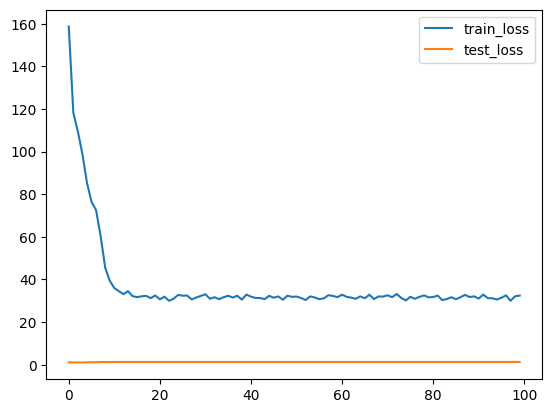

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])